In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

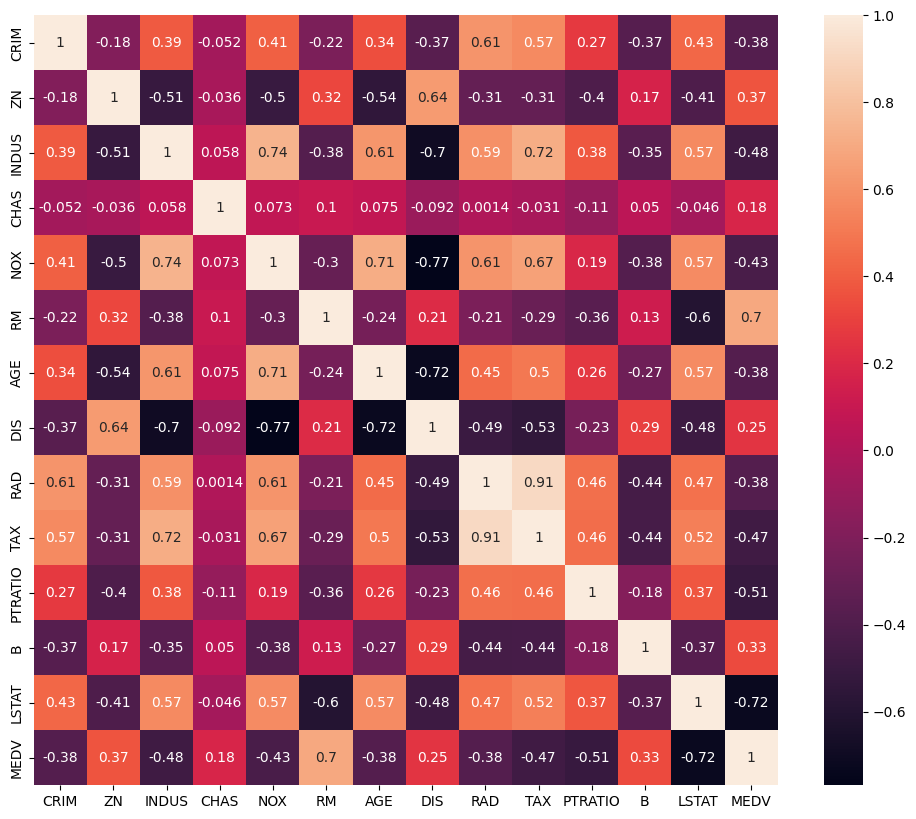

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,)

In [9]:
X=df[['RM','PTRATIO','LSTAT']]
y=df[['MEDV']]

In [10]:
X

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.980000
1,6.421,17.8,9.140000
2,7.185,17.8,4.030000
3,6.998,18.7,2.940000
4,7.147,18.7,12.715432
...,...,...,...
501,6.593,21.0,12.715432
502,6.120,21.0,9.080000
503,6.976,21.0,5.640000
504,6.794,21.0,6.480000


In [11]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
sc=StandardScaler()

In [15]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model=Sequential()
model.add(Dense(128,input_shape=(3,),activation='relu',name='input'))
model.add(Dense(64,activation='relu',name='layer_1'))
#model.add(Dense(32,activation='relu',name='layer_2'))
model.add(Dense(1,activation='linear',name='output'))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               512       
                                                                 
 layer_1 (Dense)             (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
11/11 [==============================] - 2s 52ms/step - loss: 608.9426 - mae: 22.8334 - val_loss: 544.7458 - val_mae: 21.7388
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 574.4183 - mae: 22.1299 - val_loss: 515.5698 - val_mae: 21.0701
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 529.8491 - mae: 21.1688 - val_loss: 474.6668 - val_mae: 20.0849
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 467.2077 - mae: 19.7436 - val_loss: 417.9350 - val_mae: 18.6273
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 383.2898 - mae: 17.6985 - val_loss: 345.2480 - val_mae: 16.5692
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 285.1749 - mae: 15.1188 - val_loss: 263.1906 - val_mae: 13.8725
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 183.9820 - mae: 11.9934 - val_loss: 187.0337 - val_mae: 10.8134
Epoch 8/100
11/11 [===============

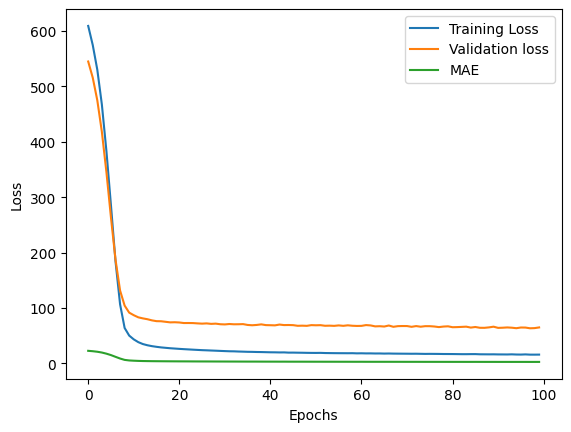

In [19]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.plot(history.history['mae'],label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
output=model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 18.5013 - mae: 3.1825


In [24]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 1ms/step
